In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
class TimeSeriesData:
    '''
    class for generating time series and related functionality
    '''
    def __init__(self, num_points, xmin, xmax):
        
        if xmin>xmax or num_points<=0 :
            print("invalid values")
            return 
        self.xmin = xmin                               # xmin
        self.xmax = xmax                               # xmax 
        self.num_points = num_points
        self.step_size = (xmax - xmin)/num_points       # get the step size for each time stamp
        self.x_data = np.linspace(xmin,xmax, num_points)
        self.y_data = np.sin(self.x_data)
        
        
    def sin_values(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps):        
        # generate random points of shape (batch_size,1)        
        rand_start = np.random.rand(batch_size, 1)
        
        # convert start of time series to be in range 
        ts_start = rand_start * (self.xmax - self.xmin - (steps* self.step_size))
        
        # create batch of time series
        batch_ts = ts_start + (np.arange(0.0, steps+1) * self.step_size)
        
        # create sin wave o/p for current batch data
        y_batch = np.sin(batch_ts)
                
        # transform output batch till steps (0 to n-1) and (1 to n)
        return y_batch[:,:-1].reshape(-1, steps,1), y_batch[:,1:].reshape(-1,steps,1)

In [84]:
timeSeriesData = TimeSeriesData(100, 0,30)
y0, y1 = timeSeriesData.next_batch(1, 10)
y0= y0.flatten()
y1= y1.flatten()
num_time_steps = 30

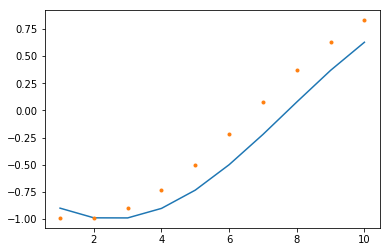

In [83]:
plt.plot(np.arange(1,len(y0)+1), y0, '-')
plt.plot(np.arange(1,len(y1)+1), y1, '.')

In [85]:
# training instance 
train_inst = np.linspace(5, 5+ timeSeriesData.step_size *(num_time_steps+1), num_time_steps+1)

In [86]:
train_inst

array([  5.  ,   5.31,   5.62,   5.93,   6.24,   6.55,   6.86,   7.17,
         7.48,   7.79,   8.1 ,   8.41,   8.72,   9.03,   9.34,   9.65,
         9.96,  10.27,  10.58,  10.89,  11.2 ,  11.51,  11.82,  12.13,
        12.44,  12.75,  13.06,  13.37,  13.68,  13.99,  14.3 ])

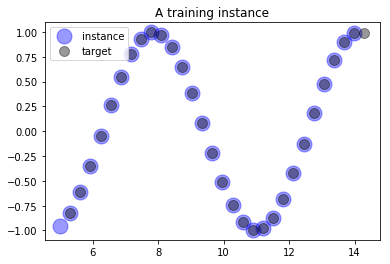

In [93]:
plt.title('A training instance')
plt.plot(train_inst[:-1], timeSeriesData.sin_values(train_inst[:-1]),'bo', markersize=15, alpha=0.4, label='instance')
plt.plot(train_inst[1:], timeSeriesData.sin_values(train_inst[1:]),'ko', markersize=10, alpha=0.4, label='target')
plt.legend()